               A2          A3          A4          A5          A6          A7  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.544656   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.601852   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               A8          A9         A10  
count  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    0.255319  
std      2.438364    3.053634    0.113148  
min      1.000000    1.000000    0.000000  
25%      2.000000    1.000000    0.255319  
50%   

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


               A2          A3          A4          A5          A6          A7  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.544656   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.601852   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               A8          A9         A10  
count  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    0.255319  
std      2.438364    3.053634    0.113148  
min      1.000000    1.000000    0.000000  
25%      2.000000    1.000000    0.255319  
50%   

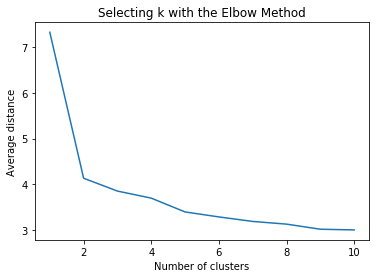

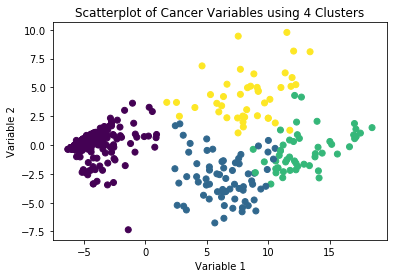

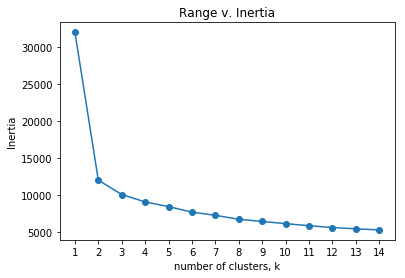

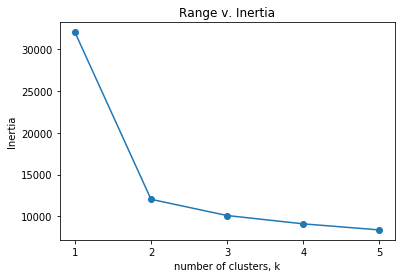

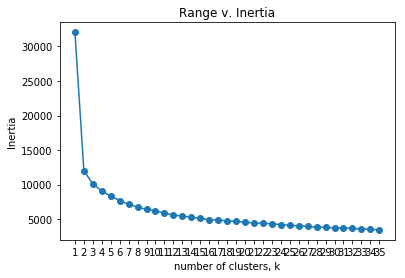

The Standard Deviation is :
A2     1.000716
A3     1.000716
A4     1.000716
A5     1.000716
A6     1.000716
A7     1.000716
A8     1.000716
A9     1.000716
A10    1.000716
dtype: float64


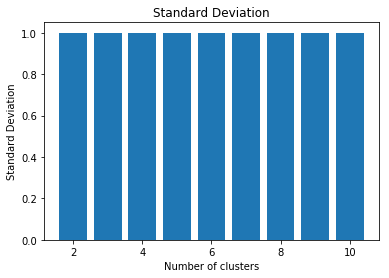

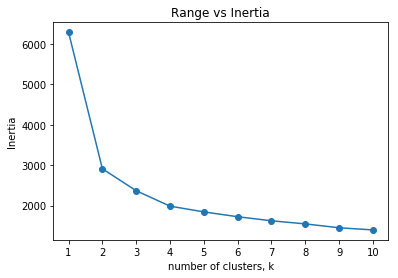

This is the centroids values:
[[ 0.95403327  1.19372295  1.18821047  1.0296067   1.03509022  1.16712
   1.08822634  1.05602587  0.04884577]
 [-0.48318495 -0.60457951 -0.60178763 -0.52146029 -0.5242375  -0.59110604
  -0.55114912 -0.53484069 -0.0247387 ]]


In [3]:


from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from statistics import stdev

%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df= pd.read_csv("Breast-Cancer-Wisconsin.csv", na_values= ["?"])
df= df.apply(pd.to_numeric, errors='coerce')

#Fill in missing values with Mean
df= df.fillna(df.mean())

df['A10'] = df['A10'].map({2:0, 4:1})

data_clean = df.fillna(df.mean())
#df.to_csv('BCW.csv') demonstrates that the mean is filling in the blanks

## Simply cleaning the data not utilizing labels since they aren't needed per the phase 2 form
cluster = data_clean[['A2','A3','A4','A5','A6','A7',
'A8','A9','A10']]

#Print the clusters and describe the output
print(cluster.describe())

#start building the clusters and import the preprocessing model
clustervar= cluster.copy()
from sklearn import preprocessing

clusterCols = ['A2','A3','A4','A5','A6','A7',
'A8','A9','A10']

# Create a for loop to utilize the Cluster Cols field
for col in clusterCols:
    cluster[col] = preprocessing.scale(cluster[col].astype('float64'))

#Print the output (describe)
print (clustervar.describe())

clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)


# Utilized to identify the k-means cluster analysis. Specifically looking at the range of 1-10 clusters
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) / clus_train.shape[0])


##Plotting the average distance from observations from the cluster centroid. Here we are utilizing the Elbow method
##to identify number of clusters to choose. We were told to use 4 in the assignment. The model shows 4 is ideal as well

plt.figure()
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

# Interpret 4 clusters for the Solution output
model3= KMeans(n_clusters=4 )
model3.fit(clus_train)
clusassign= model3.predict(clus_train)


# plot the 4 clusters
from sklearn.decomposition import PCA
pca_2 = PCA(4)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatterplot of Cancer Variables using 4 Clusters')
plt.show()
##Anna part two
#create a range of 1 to 15
ks=range(1,15)
#create an empty list for inertias values
inertias= []  
#do a for loop
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)
#Plot range v. inertias
plt.plot(ks,inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range v. Inertia')
plt.xticks(ks)
plt.show()
#The best description that I heard about this was mountain vs. rubble. 
#Where you see the mountain, that shows you the greatest difference.
#where you see "rubble" at the bottom of the mountain, the difference is not significant.
#in this case, 2 is the best number.
#I will plot another one with a smaller range
ks=range(1,6)
#create an empty list for inertias values
inertias= []  
#do a for loop
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)
#Plot range v. inertias
plt.plot(ks,inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range v. Inertia')
plt.xticks(ks)
plt.show()
#with the smaller range, the optimal is still two. Now with a larger range
ks=range(1,36)
#create an empty list for inertias values
inertias= []  
#do a for loop
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)
#Plot range v. inertias
plt.plot(ks,inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range v. Inertia')
plt.xticks(ks)
plt.show()
#this also shows that 2 is best





#Revise data variation 
#apply standard deviation function for columns A2-A10

Standard_Deviation=cluster.std()
print("The Standard Deviation is :")
print(Standard_Deviation)


#plot standard deviation values - select a graphic that could display all nine values [do not use histogram], add title, legend, ylabel, xlabel. Can you capture how wide or narrow is the variation in each column?
y=range(2,11)
plt.figure()
plt.bar(y, Standard_Deviation)
plt.xlabel('Number of clusters')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation')
plt.show()

#describe which features have a lot of data variation

#Implement normalization 
#import make_pipeline - use sklearn.pipeline
from sklearn.pipeline import make_pipeline

#import StandardScaler
from sklearn.preprocessing import StandardScaler

#review datacamp if needed on how to create a pipeline
# Create scaler: scaler
scaler = StandardScaler()

%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster)
labels = kmeans.predict(cluster)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(cluster)

# Calculate the cluster labels: labels
labels = pipeline.predict(cluster)

#use the n_cluster based on the optimal number you have identified from Inertia
inertia=[]
for k in clusters:
        model =KMeans(n_clusters=k) 
        model.fit(cluster) 
        inertia.append(model.inertia_)

plt.plot(clusters, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(clusters)
plt.show()


#find centroids and print them
centers=2
print("This is the centroids values:")
centroids = kmeans.cluster_centers_
print(centroids)


